In [1]:
''' 1. Implement a function able to extract the red component of an image'''

' 1. Implement a function able to extract the red component of an image'

In [2]:
from google.colab.patches import cv2_imshow as cv2 # for image display


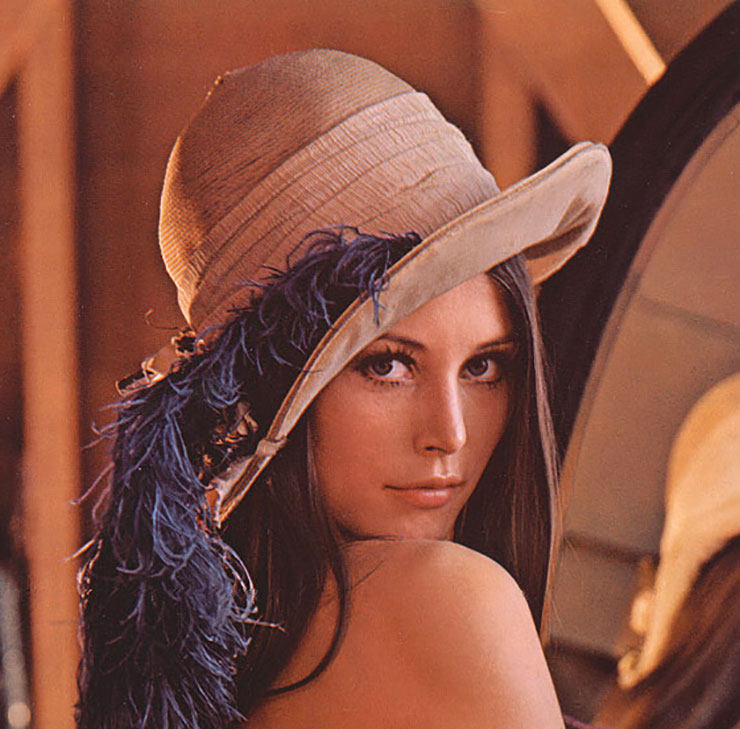

In [3]:
from google.colab.patches import cv2_imshow # for image display
import numpy as np
import pandas as pd
import cv2 as cv
from skimage import io
from PIL import Image
import matplotlib.pylab as plt


image_0 = io.imread('Lena.jpg')
# image_1 = io.imread('donjon.png')

image = cv.cvtColor(image_0, cv.COLOR_BGR2RGB)
cv2_imshow(image)

In [4]:
print(np.shape(image[:,:,2]))

(729, 740)


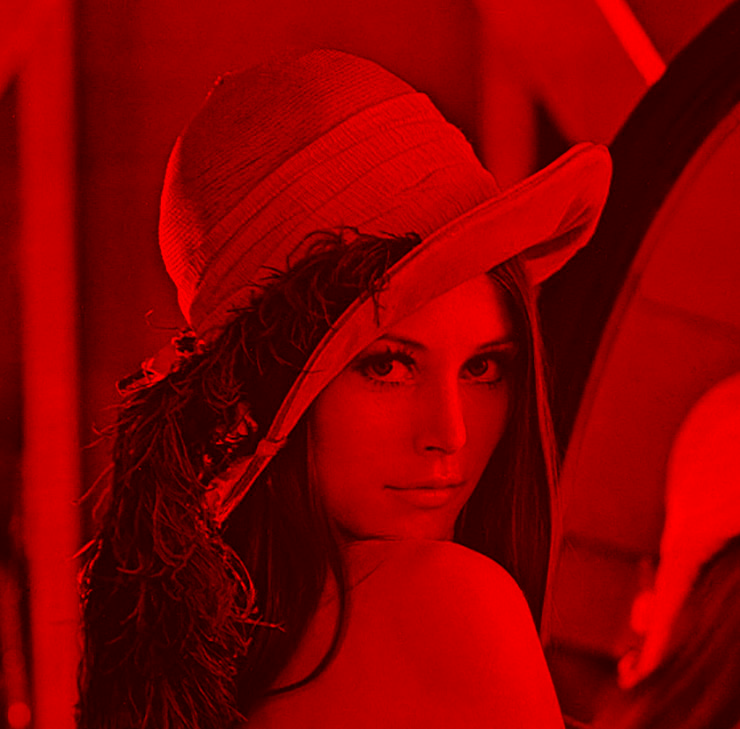

In [5]:
[rows, cols, layers] = np.shape(image)

red_pixels = image[:,:,2]
red_image = np.zeros((rows,cols, layers))

red_image[:,:,2] = red_pixels

cv2_imshow(red_image)
# print(red_image)

In [6]:
'''2. Implement a function able to generate the negative of an image (from 255,
you will so need to substract the intensity’s component – RGB - of each pixel.
This will invert each color’s intensity of each pixel: the bright will become dark
and vice versa).'''

'2. Implement a function able to generate the negative of an image (from 255,\nyou will so need to substract the intensity’s component – RGB - of each pixel.\nThis will invert each color’s intensity of each pixel: the bright will become dark\nand vice versa).'

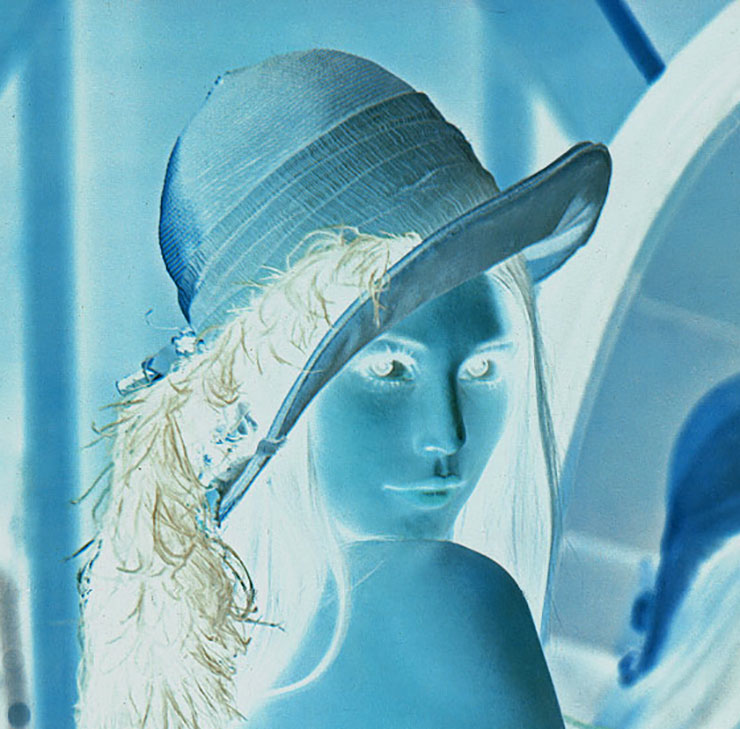

In [7]:
#create an array containing only 255 values

ones_array = np.ones((rows,cols, layers))
white_img = 255*ones_array

inverse_img = white_img - image
cv2_imshow(inverse_img)

In [8]:
'''3. Convert a color image in black and white (gray level). In such an image,
each pixel is black, white or has a gray level between 0 and 1. This means
that the components have the same value. The standard formula giving the
grey level function of the components is:'''

'3. Convert a color image in black and white (gray level). In such an image,\neach pixel is black, white or has a gray level between 0 and 1. This means\nthat the components have the same value. The standard formula giving the\ngrey level function of the components is:'

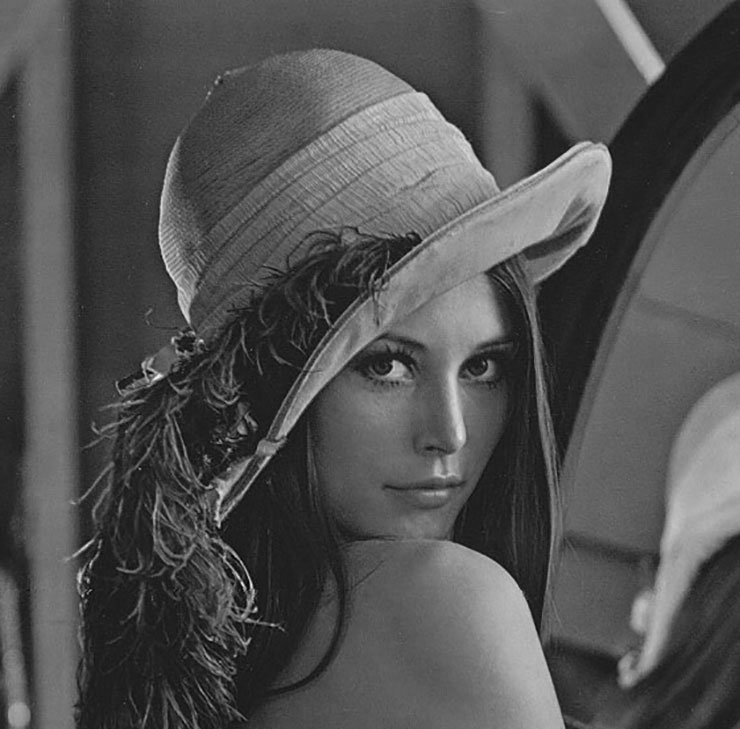

In [9]:
bnw_list = [[0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2] for pixel in col] for col in image]
bnw_img = np.array(bnw_list)
cv2_imshow(bnw_img)

In [10]:
'''4. Convert a color image to sepia tones. In photography, sepia is a print quality
that looks like black and white, but with variations of brown, not gray. In the
transformation of a color image into an image in sepia tones, we consider
the next transformations:'''

'4. Convert a color image to sepia tones. In photography, sepia is a print quality\nthat looks like black and white, but with variations of brown, not gray. In the\ntransformation of a color image into an image in sepia tones, we consider\nthe next transformations:'

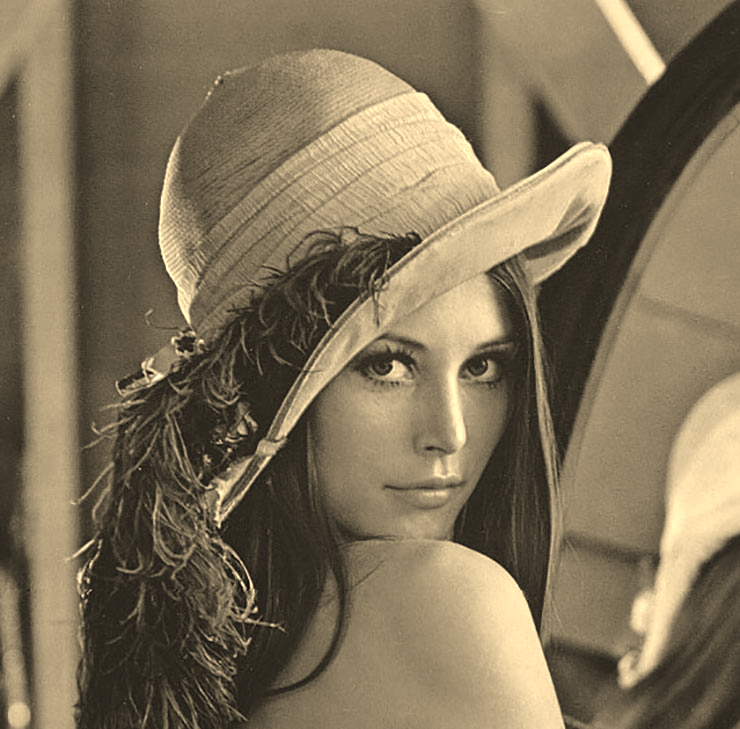

In [11]:
inputRed = image[:,:,2]
inputGreen = image[:,:,1]
inputBlue = image[:,:,0]

outputRed = (inputRed * .393) + (inputGreen *.769) + (inputBlue * .189)
outputGreen = (inputRed * .349) + (inputGreen *.686) + (inputBlue * .168)
outputBlue = (inputRed * .272) + (inputGreen *.534) + (inputBlue * .131)

sepia_img = np.zeros((rows, cols, layers))

sepia_img[:,:,2] = outputRed
sepia_img[:,:,1] = outputGreen
sepia_img[:,:,0] = outputBlue

cv2_imshow(sepia_img)

In [12]:
''' 5. "Contrast". For each component of each pixel,
apply the following rules: a. If the value is less than
30, assign the value 0.
b. If the value is greater than 225, assign the value 255.
c. The c values between 30 and 225 will be recalculated with the formula:
(255.0 / 195.0) * (c - 30) + 0.5.
With a calculator, you will find that, for example: 30 becomes 0, 225
becomes 255, 45 becomes 20, 180 becomes 196, 120 becomes 118. The
values "deviate" from each other, which increases the contrast. '''

' 5. "Contrast". For each component of each pixel,\napply the following rules: a. If the value is less than\n30, assign the value 0.\nb. If the value is greater than 225, assign the value 255.\nc. The c values between 30 and 225 will be recalculated with the formula:\n(255.0 / 195.0) * (c - 30) + 0.5.\nWith a calculator, you will find that, for example: 30 becomes 0, 225\nbecomes 255, 45 becomes 20, 180 becomes 196, 120 becomes 118. The\nvalues "deviate" from each other, which increases the contrast. '

76
60


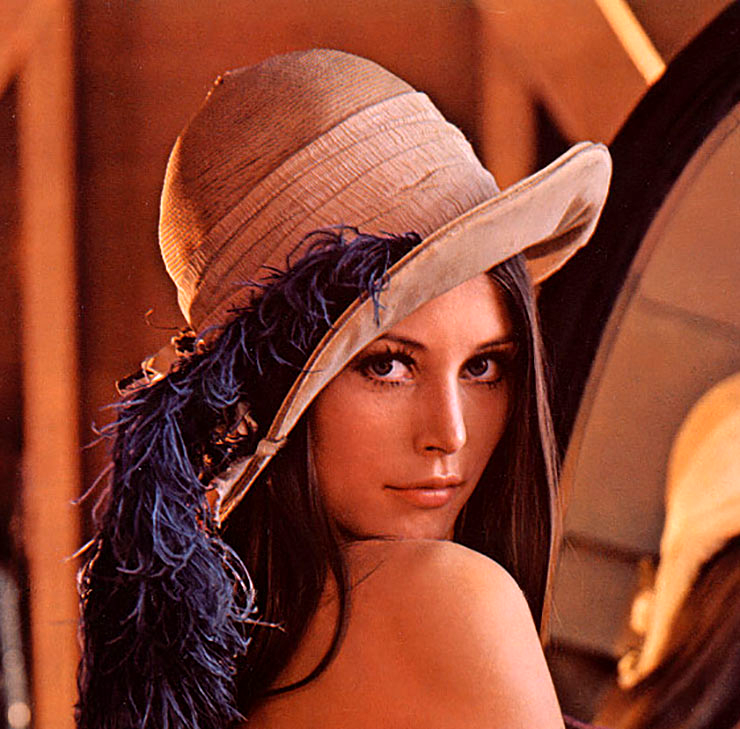

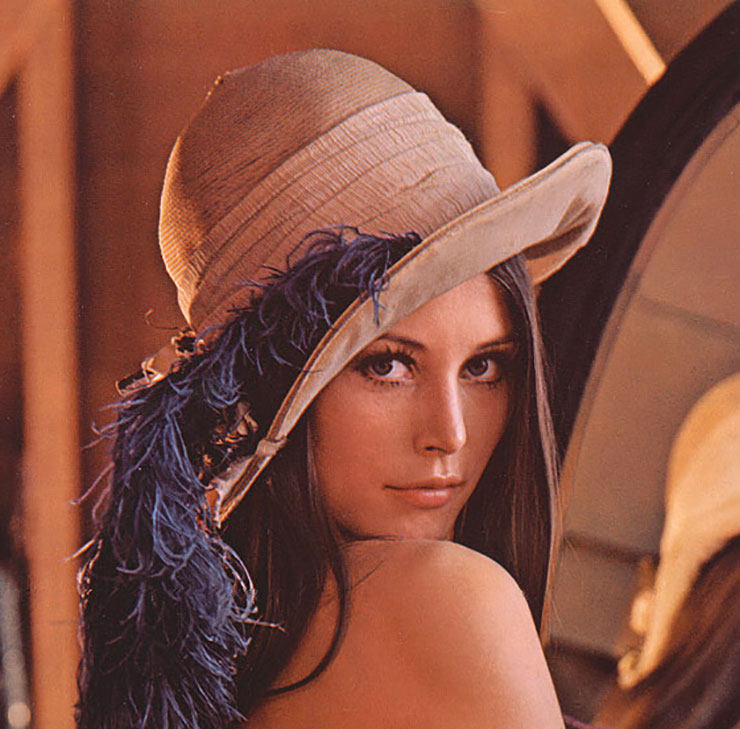

In [13]:
# create copie
contrast_img = image.copy()

for i in range(len(contrast_img)):
  for j in range(len(contrast_img[i,:,:])):
    for k in range(len(contrast_img[i, j,:])):

      if contrast_img[i,j,k] < 30: 
        contrast_img[i,j,k]=0
      elif contrast_img[i,j,k] > 225:
        contrast_img[i,j,k] = 255
      else:
        contrast_img[i,j,k] = (255.0 / 195.0) * (contrast_img[i,j,k] - 30) + 0.5

print(image[2,30,0])
print(contrast_img[2,30,0])

cv2_imshow(contrast_img)
cv2_imshow(image)

In [14]:
'''6. Thresholding. Image thresholding is the simplest method of image
segmentation. From a grayscale image, image thresholding can be used to
create an image with only two values, black or white (monochrome). The
pixels of an image are replaced one by one with respect to a fixed threshold
value (for example 123). Thus, if a pixel has a value greater than the threshold
(for example 150), it will take the value 255 (white), and if its value is lower
(for example 100), it will take the value 0 (black).'''

'6. Thresholding. Image thresholding is the simplest method of image\nsegmentation. From a grayscale image, image thresholding can be used to\ncreate an image with only two values, black or white (monochrome). The\npixels of an image are replaced one by one with respect to a fixed threshold\nvalue (for example 123). Thus, if a pixel has a value greater than the threshold\n(for example 150), it will take the value 255 (white), and if its value is lower\n(for example 100), it will take the value 0 (black).'

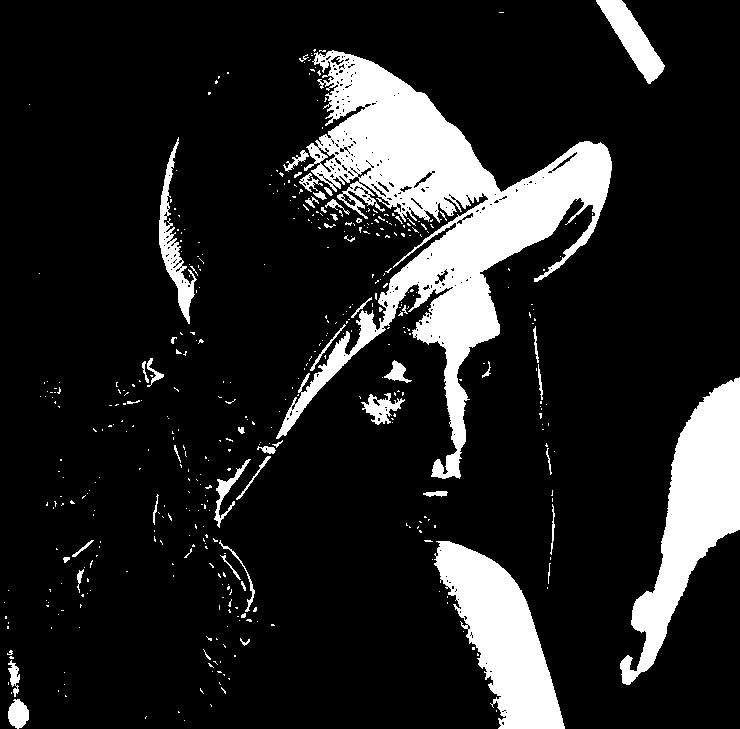

In [15]:
#for black and white images

monochrome_list = [[255 if pixel > 123 else 0 for pixel in col] for col in bnw_img]

monochrome = np.array(monochrome_list)

cv2_imshow(monochrome)

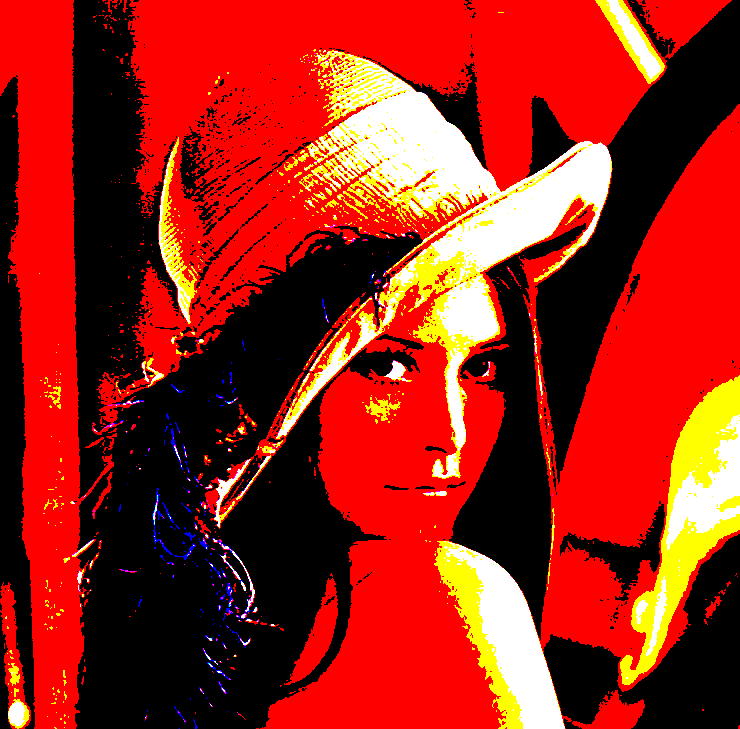

In [16]:
# for multicolored images


monochrome_list = [[[255 if layer > 123 else 0 for layer in pixel] for pixel in col] for col in image]

monochrome = np.array(monochrome_list)

cv2_imshow(monochrome)

In [17]:
'''7. Flip the image around the horizontal axis.'''

'7. Flip the image around the horizontal axis.'

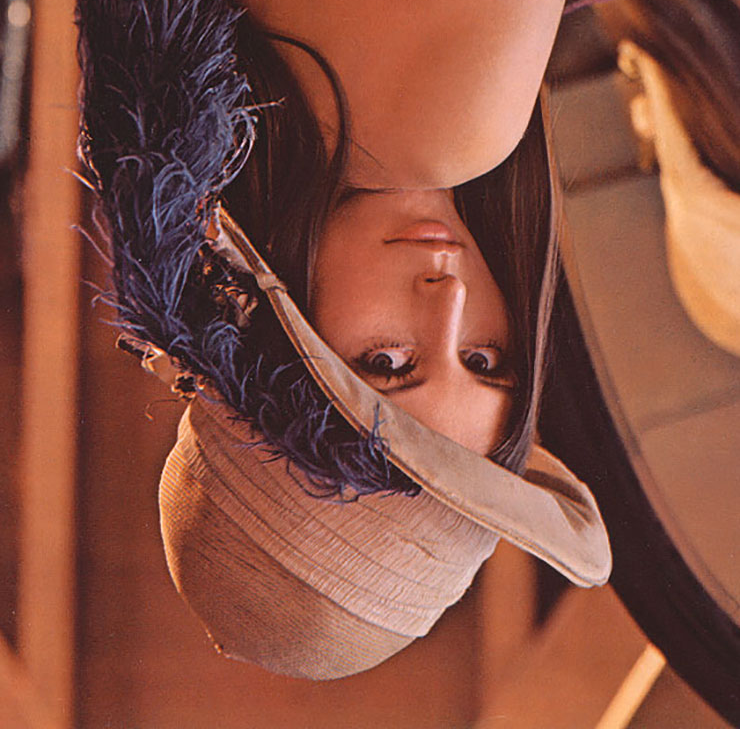

In [18]:
flipped = image.copy()

for i in range(len(flipped)):
  for j in range(len(flipped[i,:,:])):
    flipped[i, j, :] = image[rows-i-1, j, :]

cv2_imshow(flipped)

In [19]:
'''8. Generate a blue border with a width of 5 pixels'''

'8. Generate a blue border with a width of 5 pixels'

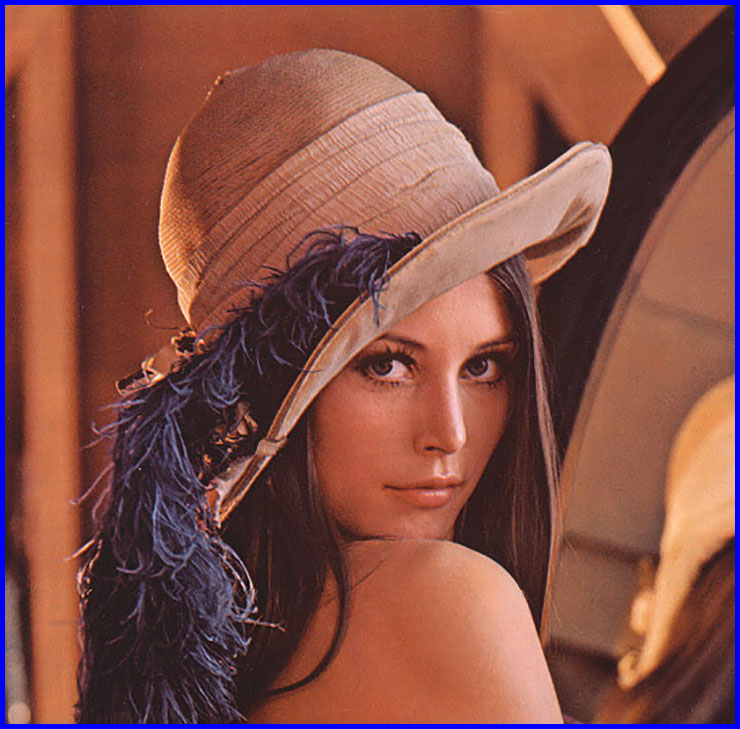

In [20]:
blue_border = image.copy()

for i in range(5):
  blue_border[i, :, :] = np.array([255,0,0])
  blue_border[rows-1-i, :, :] = np.array([255,0,0])
  blue_border[:, i, :] = np.array([255,0,0])
  blue_border[:, cols -1-i, :] = np.array([255,0,0])

cv2_imshow(blue_border)

In [21]:
'''9. Create an edge that will give an impression of relief. It will consist of 4
polygonal regions with a width of 10 pixels. The pixels of the top region will
be lightened by 65, those of the bottom region darkened by 65. On the right
and left, they will be darkened by 40. The difficulty of the exercise lies in
managing the corners ...'''

'9. Create an edge that will give an impression of relief. It will consist of 4\npolygonal regions with a width of 10 pixels. The pixels of the top region will\nbe lightened by 65, those of the bottom region darkened by 65. On the right\nand left, they will be darkened by 40. The difficulty of the exercise lies in\nmanaging the corners ...'

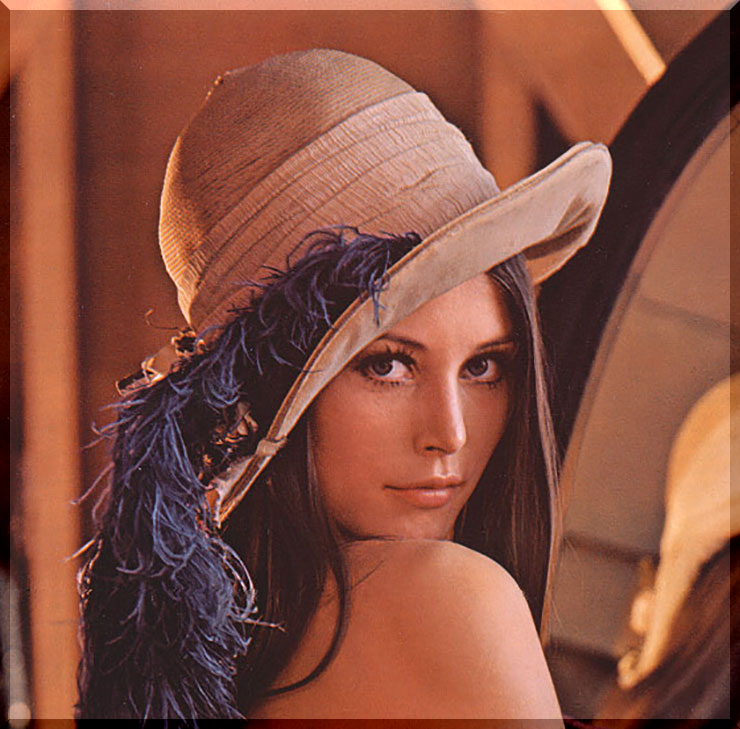

In [22]:
relief = image.copy()
relief = np.array(relief, dtype=np.int32)

for i in range(10):
  relief[i, i:cols-i,:] += 65
  relief[rows-1-i, i:cols-i,:] -= 65
  relief[i:rows-i, i,:] -= 40
  relief[i:rows-i, cols-i-1,:] -= 40

cv2_imshow(relief)

In [23]:
''' 10. "Pixelize" (ordinal = 10). The idea is to divide the image into squares of 10 by
10 pixels (in the edges, they will be rectangles). In a "square", each
component of each pixel will be the average value of the square.'''

' 10. "Pixelize" (ordinal = 10). The idea is to divide the image into squares of 10 by\n10 pixels (in the edges, they will be rectangles). In a "square", each\ncomponent of each pixel will be the average value of the square.'

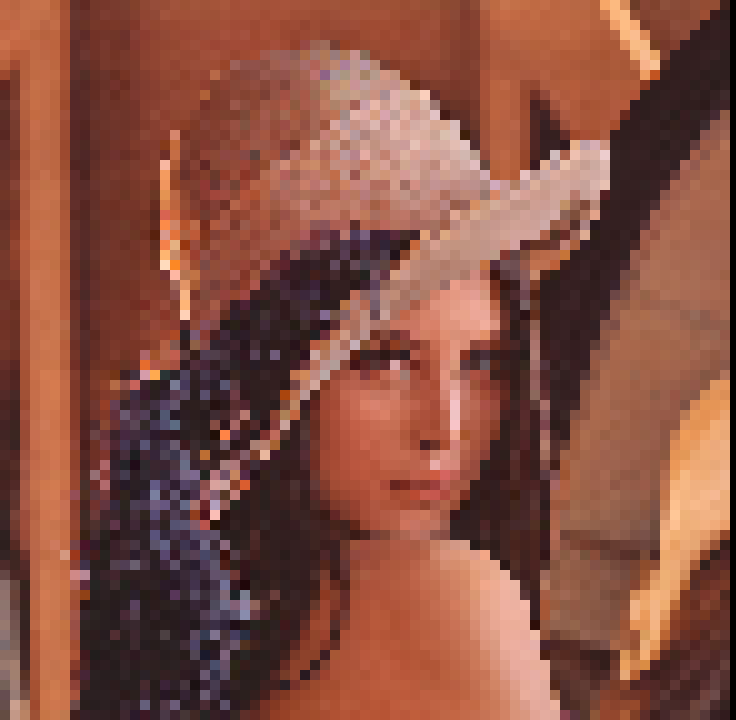

In [37]:
cut_image = image[4:rows-5, 2:cols-2,:]
rows1, cols1, layers1 = np.shape(cut_image)

vertical_divisions = int(rows1/10)
horizontal_divisions = int(cols1/10)

temp_array = np.zeros((vertical_divisions, horizontal_divisions, layers))

for ii,i in enumerate(range(5, rows1, 10)):
  for jj,j in enumerate(range(5, cols1-1, 10)):
    # print(i,ii,j,jj)

    temp_array[ii, jj, :] = cut_image[i,j,:] if jj != 73 else None

for i in range(len(cut_image)):
  for j in range(len(cut_image[i,:,:])):
      ii = i // 10
      jj = j // 10
      
      cut_image[i,j,:] = temp_array[ii, jj, :] if jj != 73 else 0

# print(cut_image)
cv2_imshow(cut_image)